# ロジスティック回帰

## インポート

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

## ロード

In [2]:
activity = pd.read_csv("data/activity.csv")
activity.describe()

,Acc (vertical),LyingDown
count,494.000000,494.000000
mean,45.512363,0.516194
std,44.799360,0.500244
min,-48.459000,0.000000
25%,0.918650,0.000000
50%,41.109500,1.000000
75%,89.339000,1.000000
max,112.310000,1.000000


In [3]:
activity.head()

,Acc (vertical),LyingDown
0,96.229,0
1,84.746,0
2,82.449,0
3,106.560,0
4,80.152,0


## 学習

In [4]:
X = activity[["Acc (vertical)"]]
y = activity[["LyingDown"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1次元にする（後のfitでエラーになるため）
y_train = np.reshape(y_train, (-1))
y_test = np.reshape(y_test, (-1))

# ※2次元に戻す場合は下記
# y_train=np.reshape(y_test,(-1,1))
# y_test=np.reshape(y_test,(-1,1))

In [5]:
clf = LogisticRegression().fit(X_train, y_train)

### 係数

In [6]:
clf.coef_

array([[-0.1177466]])

### 切片

In [7]:
clf.intercept_

array([6.10177895])

<Axes: xlabel='Acc (vertical)', ylabel='LyingDown'>

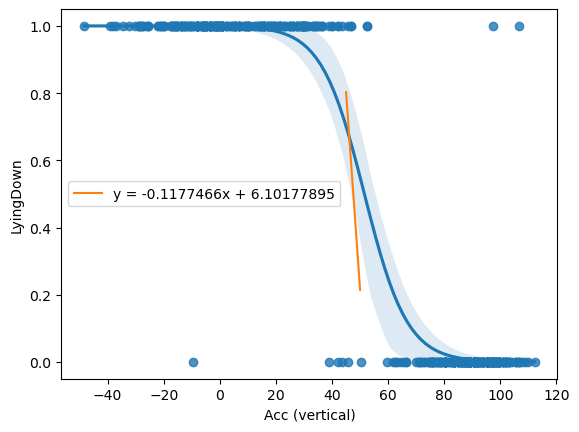

In [8]:
# 実データのプロット
sns.regplot(x="Acc (vertical)", y="LyingDown", data=activity, logistic=True)

# 求めた直線の描画
x = np.linspace(45, 50, 100)  # x軸の値
slope = -0.1177466  # 傾き
intercept = 6.10177895  # 切片
y = slope * x + intercept  # 直線の式
sns.lineplot(x=x, y=y, label=f'y = {slope}x + {intercept}')

## 予測

In [9]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

### 確率

In [10]:
clf.predict_proba(X_test)[::,-1]

array([2.31693308e-02, 9.97511568e-01, 1.04282071e-02, 1.05672351e-03,
       9.99781257e-01, 1.04282071e-02, 4.66017106e-03, 9.95733864e-01,
       9.72343955e-01, 2.31693308e-02, 9.97825589e-01, 1.36212174e-02,
       3.43616982e-02, 9.95733864e-01, 9.98892860e-01, 5.75929752e-02,
       4.77298577e-01, 6.09795092e-03, 9.98732777e-01, 9.92695617e-01,
       3.91403776e-02, 9.31712676e-01, 9.64063419e-01, 1.55638073e-02,
       9.83708329e-01, 1.19195424e-02, 7.55107906e-01, 8.74057100e-01,
       3.43616982e-02, 9.91646273e-01, 1.77763901e-02, 1.19195424e-02,
       9.97152314e-01, 2.64340977e-02, 9.98892860e-01, 1.19195424e-02,
       9.31712676e-01, 9.95119247e-01, 9.00935568e-01, 9.22594161e-01,
       8.39846087e-02, 9.99624389e-01, 1.19195424e-02, 8.01629006e-01,
       5.33106480e-03, 1.36212174e-02, 3.01447030e-02, 3.55976011e-03,
       4.07288328e-03, 1.19195424e-02, 9.98892860e-01, 6.53836704e-02,
       4.07288328e-03, 9.98892860e-01, 9.12067619e-03, 9.53422359e-01,
      

## 混同行列（confusion matrix）

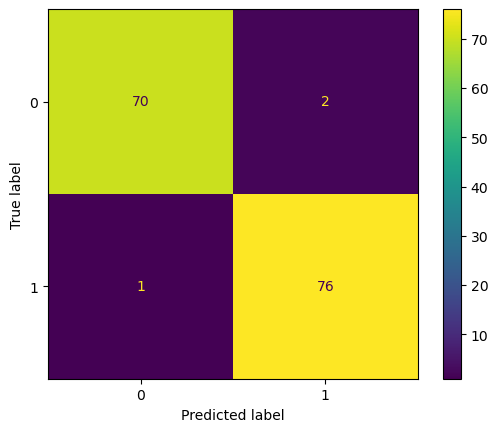

In [11]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot()

真陰性　　偽陽性  
偽陰性　　真陽性

In [12]:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.979866
Precision: 0.974359
Recall: 0.987013
F1 Score: 0.980645
